In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

Analyse building structures features

In [3]:
path = '../data/data/csv_building_structure.csv'
df = pd.read_csv(path).set_index('building_id')

values_path = '../data/data/train_labels.csv'
values = pd.read_csv(values_path).set_index('building_id')

In [4]:
df.shape

(762106, 30)

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
district_id,762106.0,25.767835,5.807555,12.0,22.0,24.0,30.0,36.0
vdcmun_id,762106.0,2582.688357,581.172767,1201.0,2204.0,2410.0,3010.0,3611.0
ward_id,762106.0,258274.277335,58117.348412,120101.0,220402.0,241004.0,301006.0,361108.0
count_floors_pre_eq,762106.0,2.087783,0.655101,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,762106.0,1.252058,1.063275,0.0,0.0,1.0,2.0,9.0
age_building,762106.0,24.326405,65.043704,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,762106.0,406.672576,226.779371,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,762106.0,16.049372,5.493878,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,762106.0,9.868817,8.574169,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,762106.0,0.042401,0.201502,0.0,0.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

In [7]:
#Let's begin with insights about the target

In [8]:
d = {"Grade 1": 1,
     "Grade 2": 2,
     "Grade 3": 3,
     "Grade 4": 4,
     "Grade 5": 5,
     }

df_2 = df['damage_grade'].map(d)


In [9]:
#df['damage_grade'].map(d).plot.bar();

In [10]:
df['damage_grade'].value_counts()/len(df)*100


Grade 5    36.184730
Grade 4    24.123153
Grade 3    17.899347
Grade 2    11.449457
Grade 1    10.341737
Name: damage_grade, dtype: float64

In [11]:
#removing naan from damage grade, position, plan_configuration,technical_solution_proposed

In [12]:
pd.Series(df.isna().sum(axis=0))


district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_supers

In [13]:
df.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]


position                        1
plan_configuration              1
damage_grade                   12
technical_solution_proposed    12
dtype: int64

In [14]:
dff=df.dropna()

In [15]:
dff.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]


position                       0
plan_configuration             0
damage_grade                   0
technical_solution_proposed    0
dtype: int64

In [28]:
dff.damage_grade.unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4'],
      dtype=object)

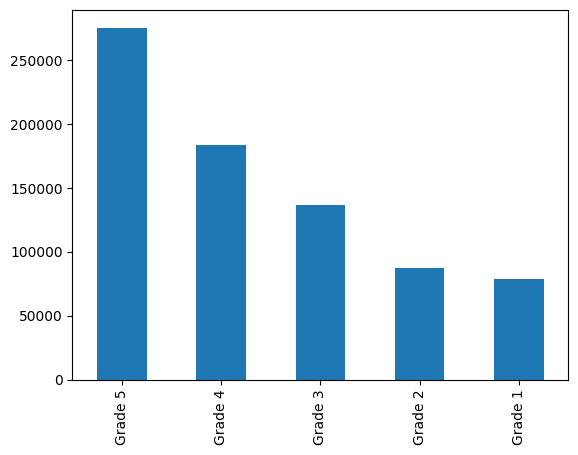

In [30]:
dff.damage_grade.value_counts().plot(kind="bar");

In [16]:
d = {"Grade 1": 1,
     "Grade 2": 2,
     "Grade 3": 3,
     "Grade 4": 4,
     "Grade 5": 5,
     }

dff["damage_grade"].map(d).mean()


3.643606956622149

In [17]:
values['damage_grade'].mean()


2.2382723013342236

In [18]:
for col, name in zip(dff, dff.columns):
    if dff[col].dtypes == 'object':
        print(name, dff[col].unique())

land_surface_condition ['Flat' 'Moderate slope' 'Steep slope']
foundation_type ['Other' 'Mud mortar-Stone/Brick' 'Cement-Stone/Brick' 'Bamboo/Timber'
 'RC']
roof_type ['Bamboo/Timber-Light roof' 'Bamboo/Timber-Heavy roof' 'RCC/RB/RBC']
ground_floor_type ['Mud' 'Brick/Stone' 'RC' 'Timber' 'Other']
other_floor_type ['Not applicable' 'TImber/Bamboo-Mud' 'Timber-Planck' 'RCC/RB/RBC']
position ['Not attached' 'Attached-1 side' 'Attached-2 side' 'Attached-3 side']
plan_configuration ['Rectangular' 'L-shape' 'Square' 'T-shape' 'Multi-projected' 'H-shape'
 'U-shape' 'Others' 'E-shape' 'Building with Central Courtyard']
condition_post_eq ['Damaged-Used in risk' 'Damaged-Repaired and used'
 'Damaged-Rubble unclear' 'Not damaged' 'Damaged-Not used'
 'Damaged-Rubble clear' 'Damaged-Rubble Clear-New building built'
 'Covered by landslide']
damage_grade ['Grade 3' 'Grade 5' 'Grade 2' 'Grade 1' 'Grade 4']
technical_solution_proposed ['Major repair' 'Reconstruction' 'Minor repair' 'No need']


# Foundation
### foundation_type:type of foundation used while building. Possible values: Mud mortar-Stone/Brick ,Bamboo/Timber,Cement-Stone/Brick,RC, Other .
###( type: categorical)


In [31]:
col = "foundation_type"
df[col].value_counts()

Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [ ]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])*100
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,6))
plt.title('Damage Grade Conditional Frequencies', y=1.05, size=15)
sns.heatmap(cmap.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

# Land surface condition
### land_surface_condition :surface condition of the land where the building was built. Posible values:flat, Moderate slope, steep slope.
###( type: categorical)


In [23]:
import matplotlib.pyplot as plt


In [22]:
col = "land_surface_condition"
df[col].value_counts()

Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [19]:
df['land_surface_condition'].value_counts()/len(df)*100


Flat              82.885452
Moderate slope    13.861589
Steep slope        3.252960
Name: land_surface_condition, dtype: float64

In [24]:
dmgs = df.merge(values, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])*100
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = values['damage_grade'].value_counts()/len(values)*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Damage Grade Conditional Frequencies', y=1.05, size=15)
sns.heatmap(cmap.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

KeyError: "['damage_grade'] not in index"

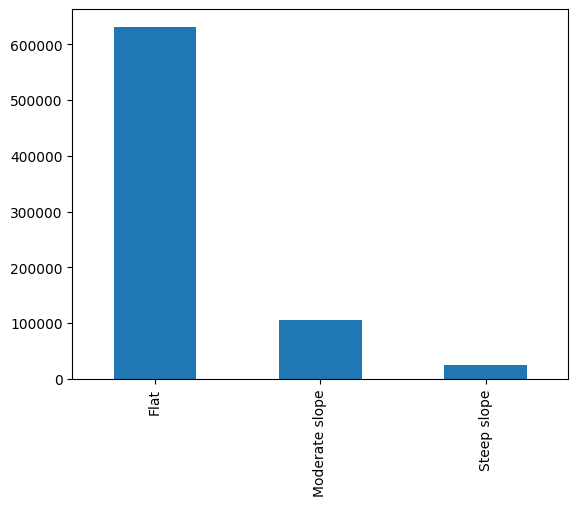

In [38]:
dff.land_surface_condition.value_counts().plot(kind="bar");

In [27]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
(expected_value/100).sort_values(by="expected_value_damage")

NameError: name 'cmap' is not defined

# Count floors
### count_floors_pre_eq:number of floors in the building before the earthquake.
###( type: int)


In [ ]:
col = 'count_floors_pre_eq'
df[col].describe()

count    762106.000000
mean          2.087783
std           0.655101
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

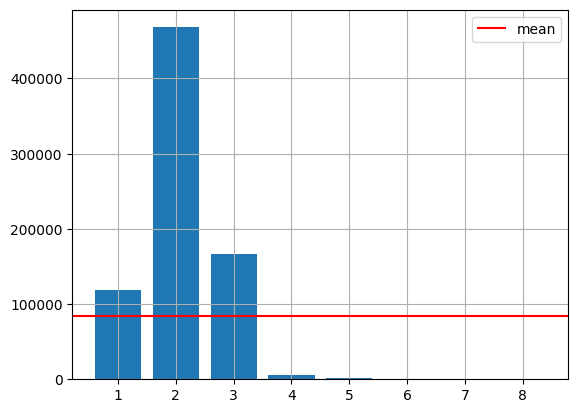

In [ ]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), max(df[col])+1)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

In [ ]:
df[col].value_counts()


2    468113
3    166993
1    118901
4      6085
5      1569
6       332
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

In [ ]:
#There are very few buildings with more than 6 floors (outliers?)

In [ ]:
#Let's visualize the probabilities of damages level for each floor count. I added the probabilities of the wholedataset for comparison



In [26]:
dmgs = df.merge(values, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(1,8), index=np.arange(1,4)).fillna(0)
for i in range(1,8):
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])*100
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = values['damage_grade'].value_counts()/len(values)*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,8))
plt.title('Damage Grade Conditional Frequencies', y=1.05, size=15)
sns.heatmap(cmap.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

KeyError: "['damage_grade'] not in index"

In [ ]:
#Ploting the mean of damages level against count floors of building. I added the mean of the wholedataset for comparison.



In [ ]:
cmap = cmap.drop(index="dataset")
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.plot(y="expected_value_damage")
plt.axhline(values['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

NameError: name 'cmap' is not defined

In [ ]:
expected_value = expected_value.sort_index()
expected_value.loc["dataset","expected_value_damage"] = values['damage_grade'].mean()
expected_value

NameError: name 'expected_value' is not defined

In [ ]:
#AGE_BUILDING

In [35]:
col = "age_building"
df[col].describe()

count    762106.000000
mean         24.326405
std          65.043704
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

In [36]:
df[col].value_counts()

15     49983
20     46525
10     39794
25     37063
12     36458
       ...  
148        1
199        1
164        1
149        1
144        1
Name: age_building, Length: 176, dtype: int64

In [ ]:
Association between superstructure and features
Here I wonder if some superstructures are always associated with certain features. Precisely, I am looking for hidden patterns (civil engineering laws or techniques, relation between superstructure and wealth of residents, etc.)

# Association between superstructure and features
### Here I wonder if some superstructures are always associated with certain features.I am looking for hidden patterns (civil engineering laws or techniques, relation between superstructure and wealth of residents, etc.)



/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1883077965.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.diag(np.diag(np.ones_like(twins, dtype=np.bool)))


<AxesSubplot:title={'center':'Conditional Frequencies'}>

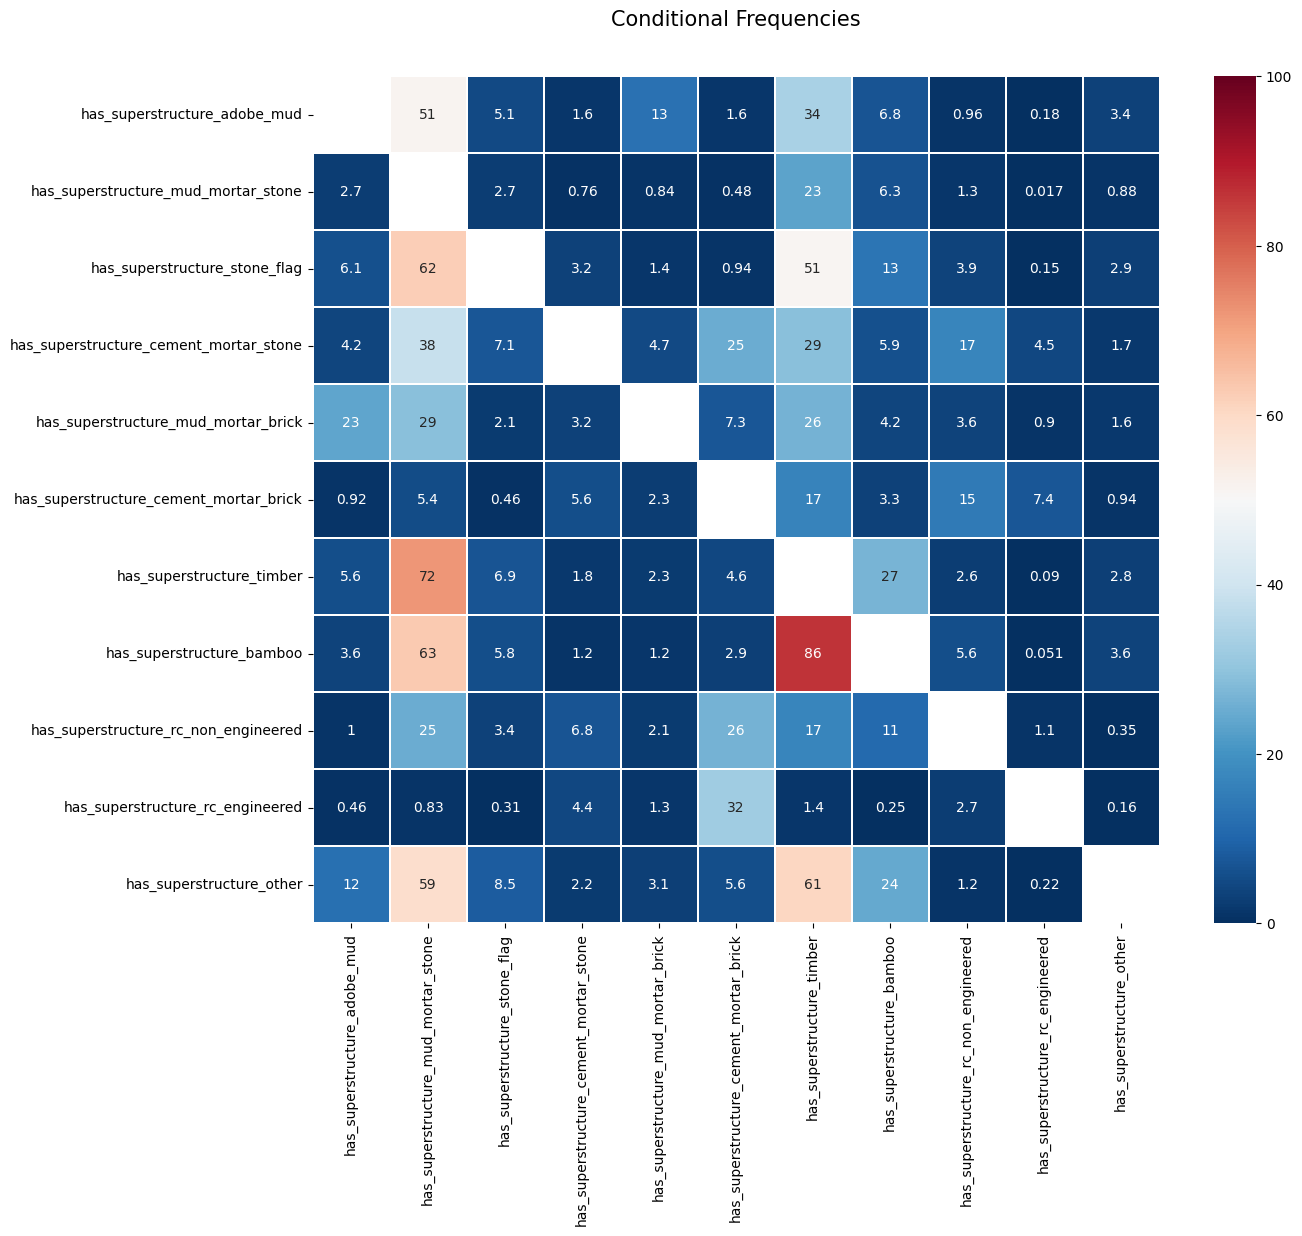

In [39]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=col1, columns=col2)
done = 0
for i in twins.index:
    for c in twins.columns:
        if i !=c :
            twins.loc[i,c] = df[df[i] ==1 ][c].sum()/len(df[df[i] ==1 ])*100
colormap = plt.cm.RdBu_r
mask = np.diag(np.diag(np.ones_like(twins, dtype=np.bool)))
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Count floors - divided by count floors



<AxesSubplot:title={'center':'Conditional Frequencies'}>

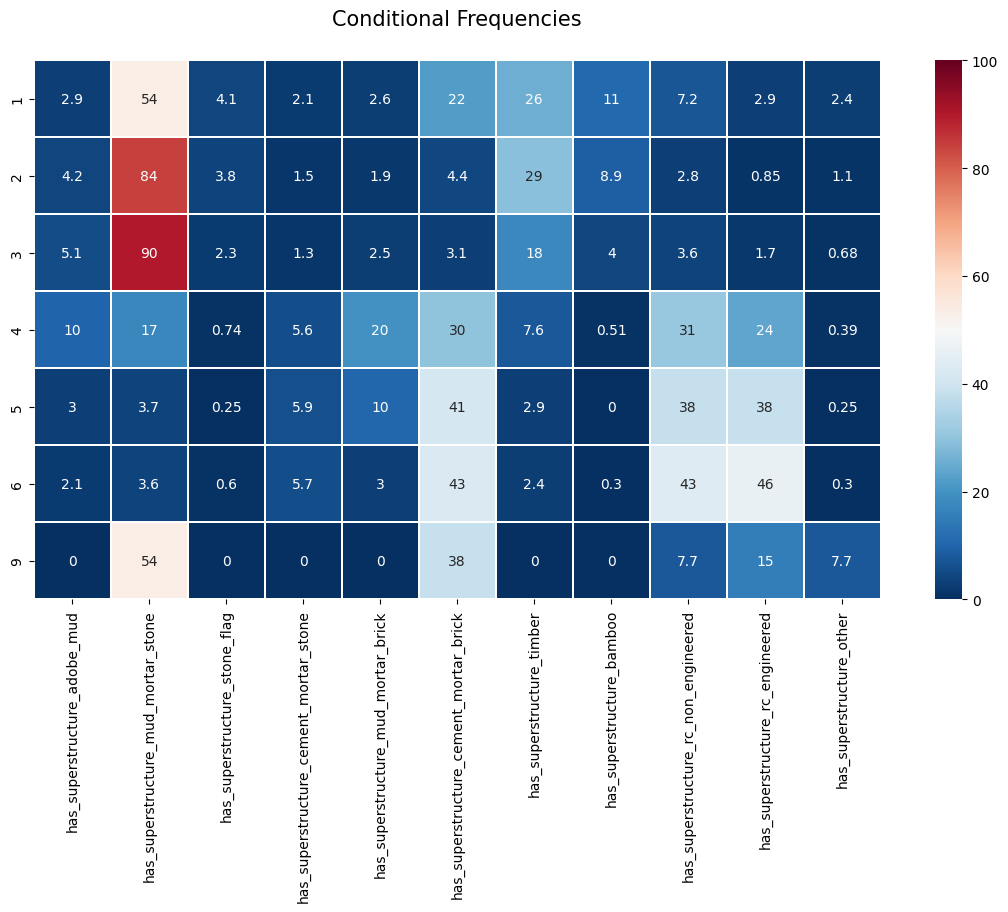

In [40]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == i ][c].sum()/len(df[df["count_floors_pre_eq"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,7))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

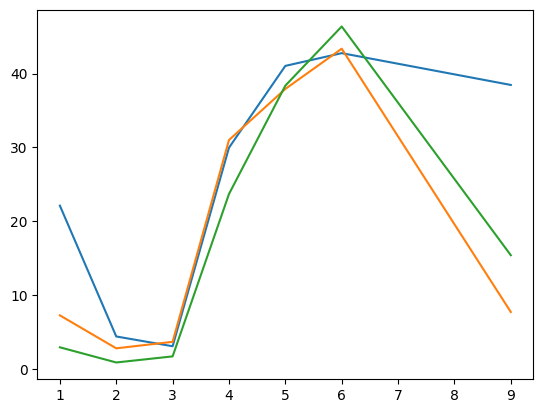

In [41]:
plt.plot(twins["has_superstructure_cement_mortar_brick"])
plt.plot(twins["has_superstructure_rc_non_engineered"])
plt.plot(twins["has_superstructure_rc_engineered"])


##### Some superstructures are correlated with the number of floors.




### Superstructure X Count floors - divided by superstructure





<AxesSubplot:title={'center':'Conditional Frequencies'}>

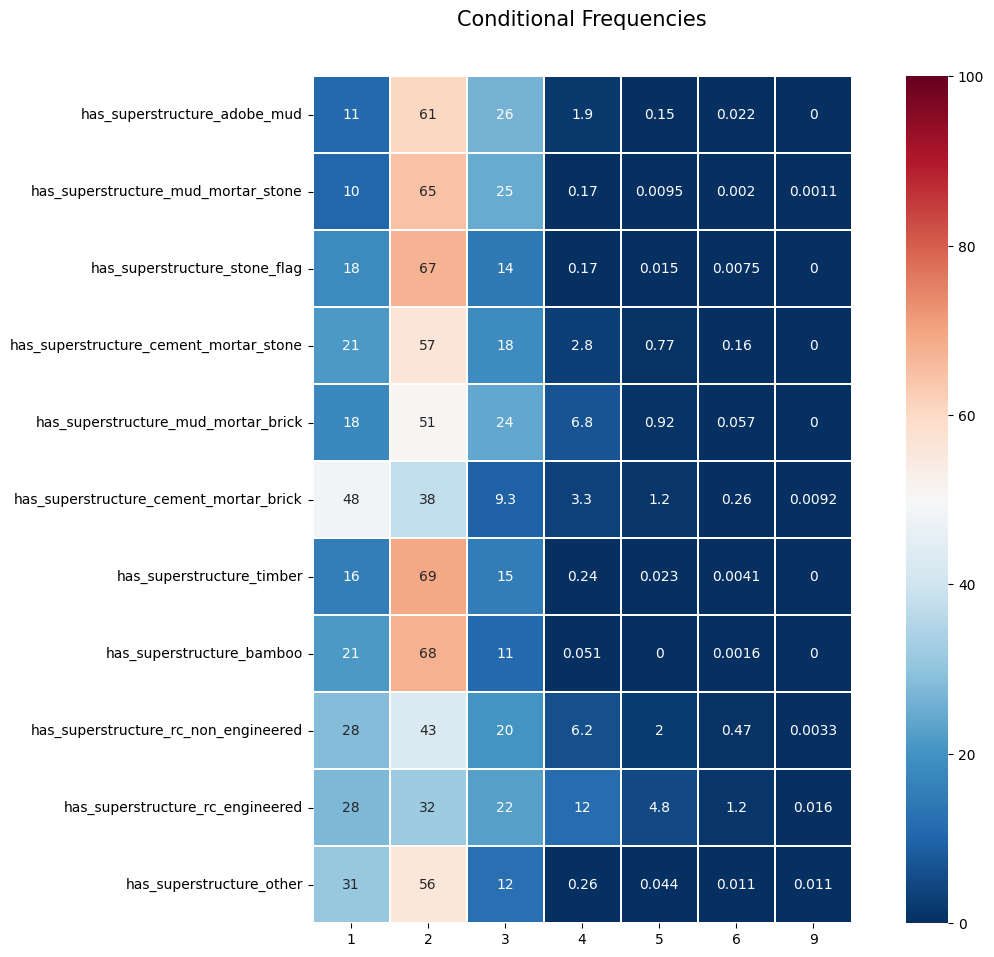

In [42]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)




##### I expected some superstructures to be used only with high-leveled buildings, but it is not the case.



### Superstructure X Age - divided by age



<AxesSubplot:title={'center':'Conditional Frequencies'}>

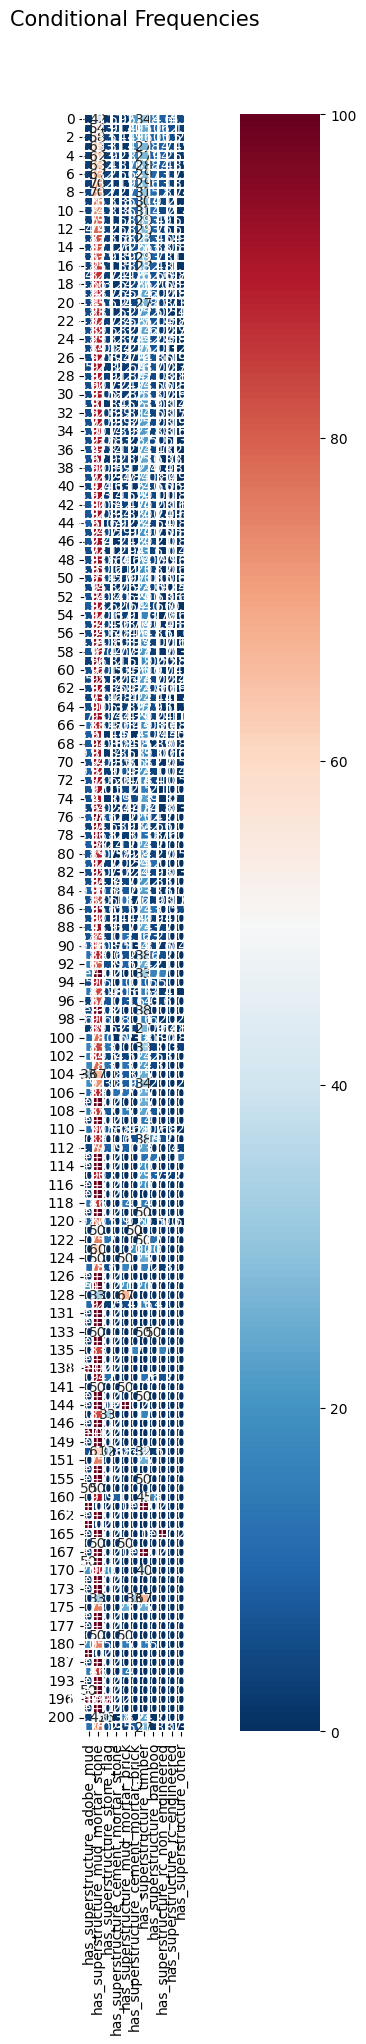

In [46]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['age_building'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['age_building'] == i ][c].sum()/len(df[df["age_building"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,21))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

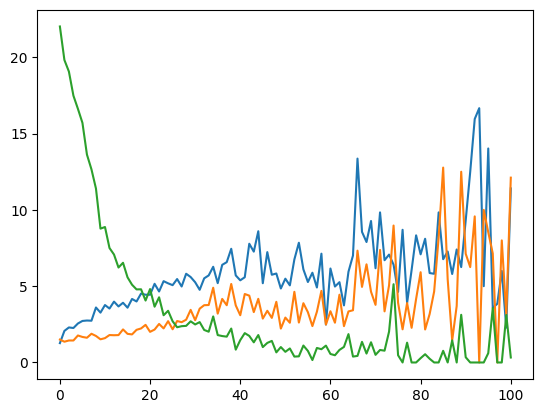

In [47]:
plt.plot(twins.loc[:100,"has_superstructure_adobe_mud"])
plt.plot(twins.loc[:100,"has_superstructure_mud_mortar_brick"])
plt.plot(twins.loc[:100,"has_superstructure_cement_mortar_brick"])


### Superstructure X Count floors after earthquake - divided by superstructure





<AxesSubplot:title={'center':'Conditional Frequencies'}>

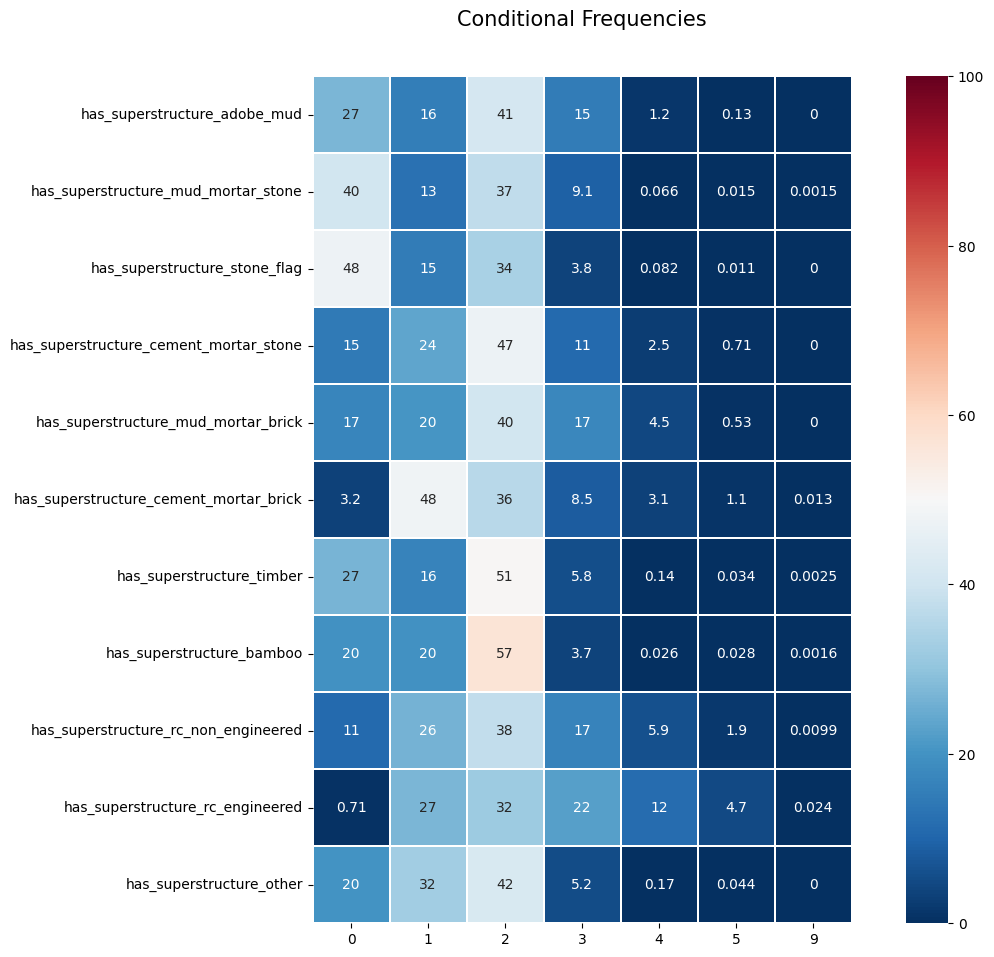

In [48]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_post_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_post_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)




### Superstructure X Area percentage (binned) - divided by area percentage







/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1262314229.py:5: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['plinth_area_sq_ft'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["plinth_area_sq_ft"].isin(np.arange(i-9,i+1))])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

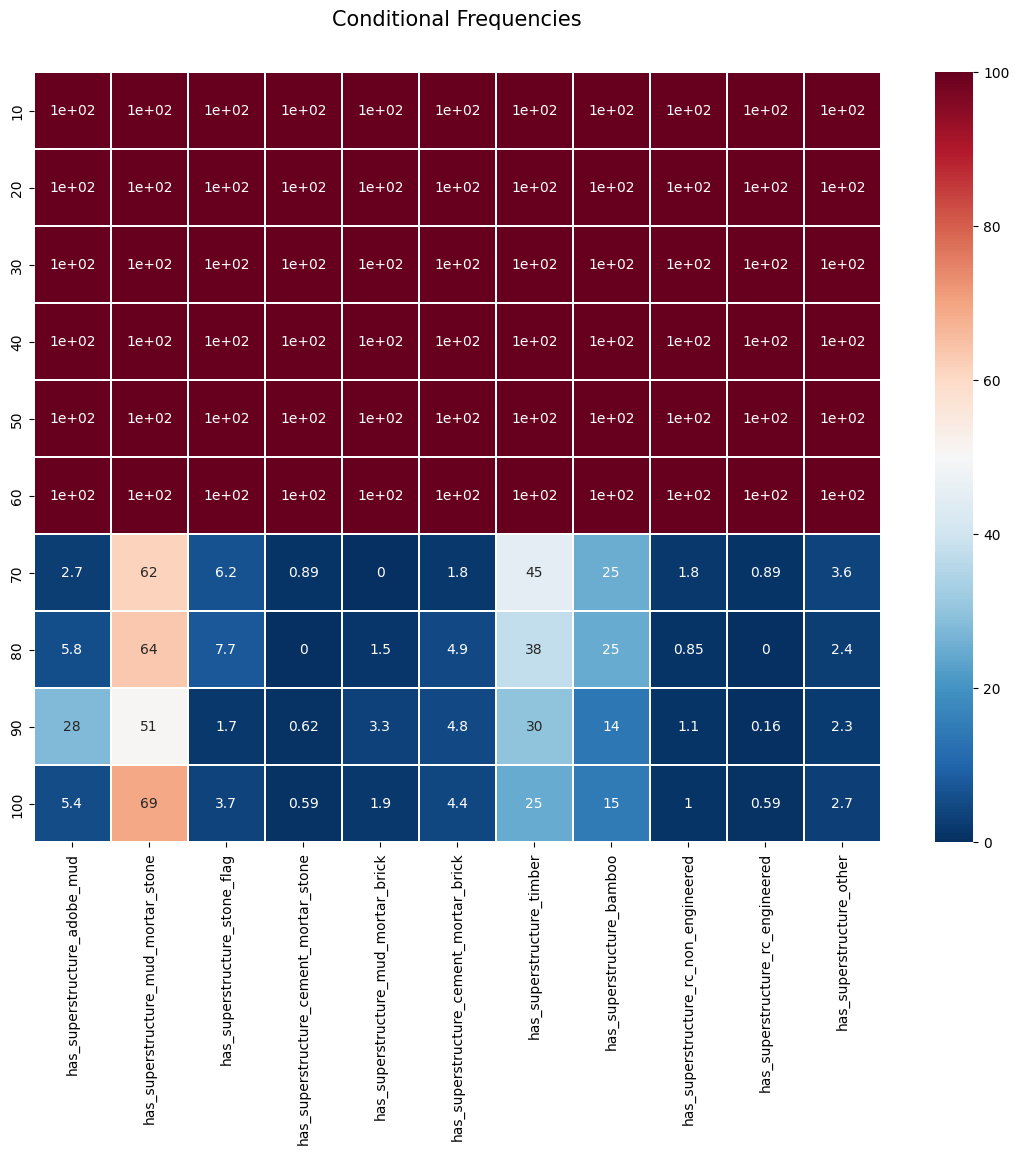

In [53]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,110,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plinth_area_sq_ft'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["plinth_area_sq_ft"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,10))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### SSuperstructure X percentage (binned) - divided by height percentage (before earthquake)





<AxesSubplot:title={'center':'Conditional Frequencies'}>

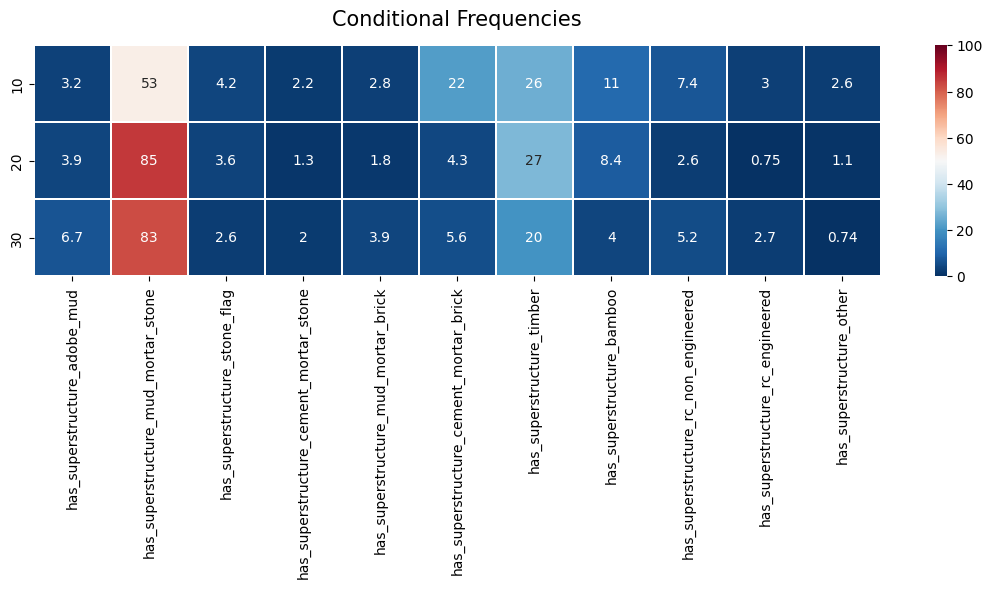

In [49]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_ft_pre_eq'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_ft_pre_eq"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### SSuperstructure X percentage (binned) - divided by height percentage (after earthquake)





<AxesSubplot:title={'center':'Conditional Frequencies'}>

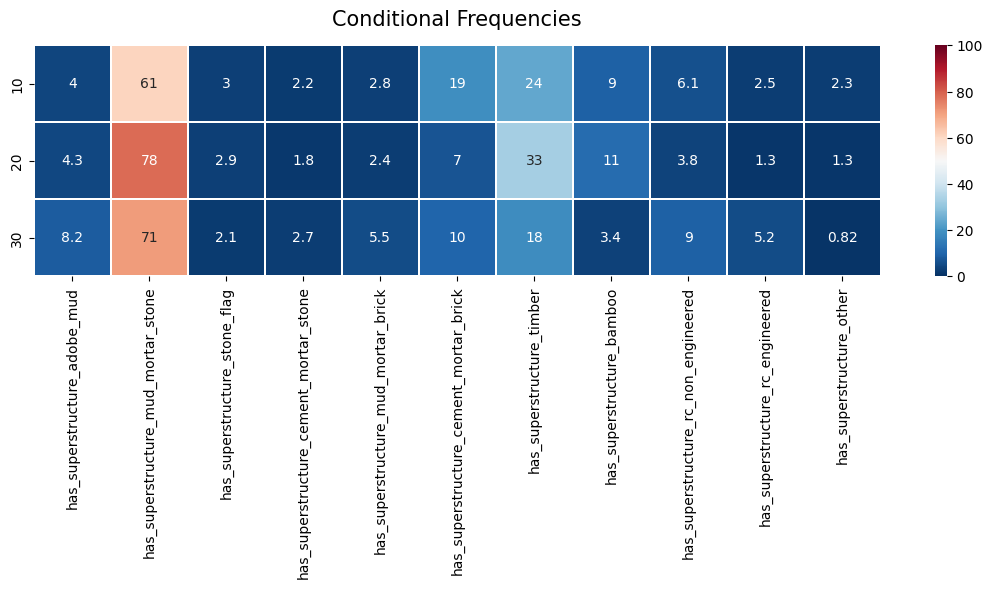

In [50]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_ft_post_eq'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_ft_post_eq"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Land surface condition - divided by sufrace condition







<AxesSubplot:title={'center':'Conditional Frequencies'}>

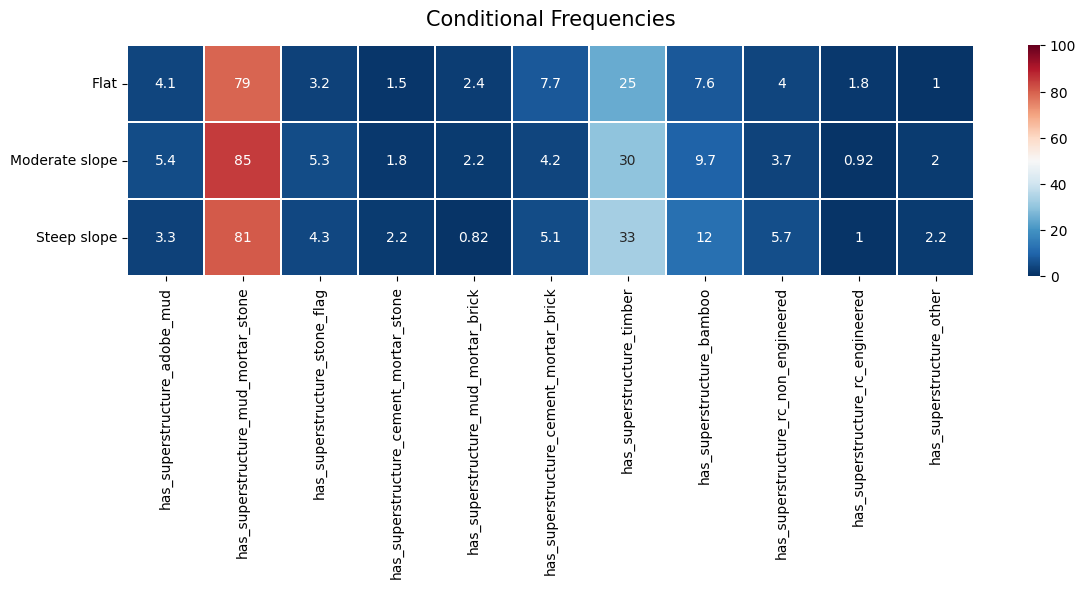

In [54]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['land_surface_condition'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['land_surface_condition'] == i ][c].sum()/len(df[df["land_surface_condition"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Each superstructure is quite uniformly distributed in each land surface condition and we can not draw any conclusion out of this tab.


### Superstructure X Foundation type - divided by foundation type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

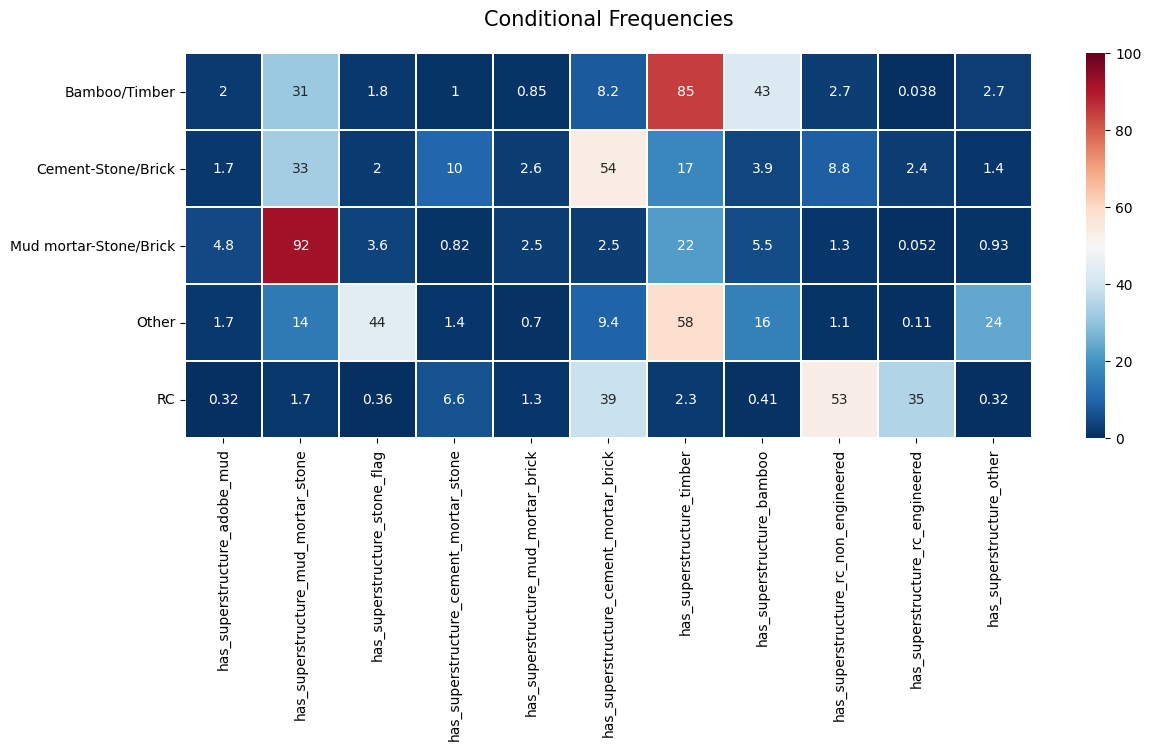

In [55]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['foundation_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['foundation_type'] == i ][c].sum()/len(df[df["foundation_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Roof type - divided by roof type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

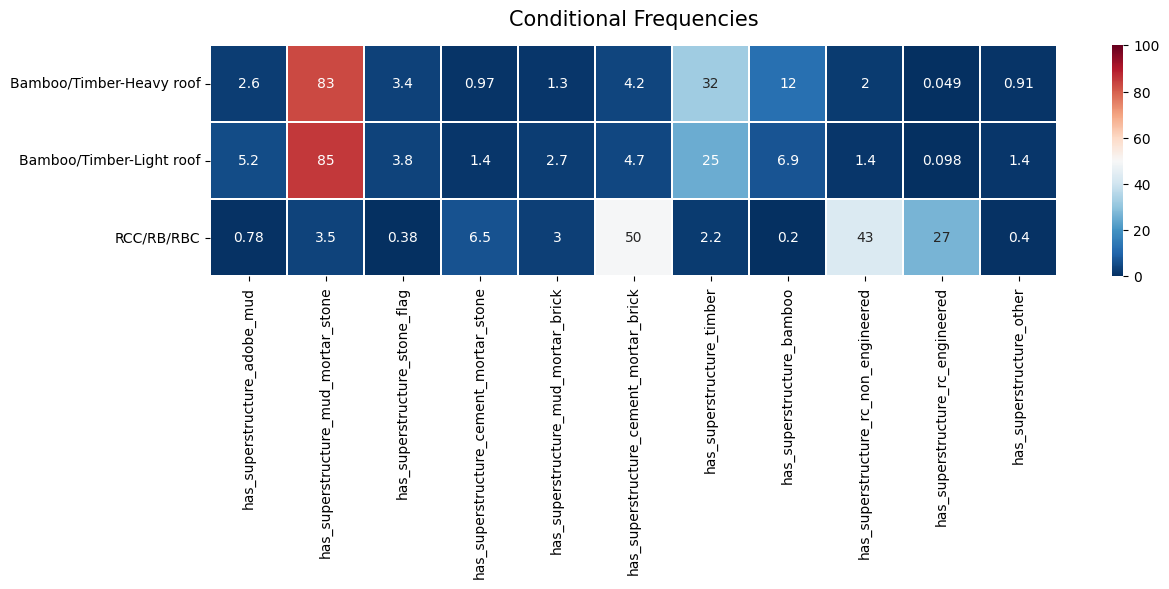

In [56]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['roof_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['roof_type'] == i ][c].sum()/len(df[df["roof_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Ground floor type - divided by ground floor type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

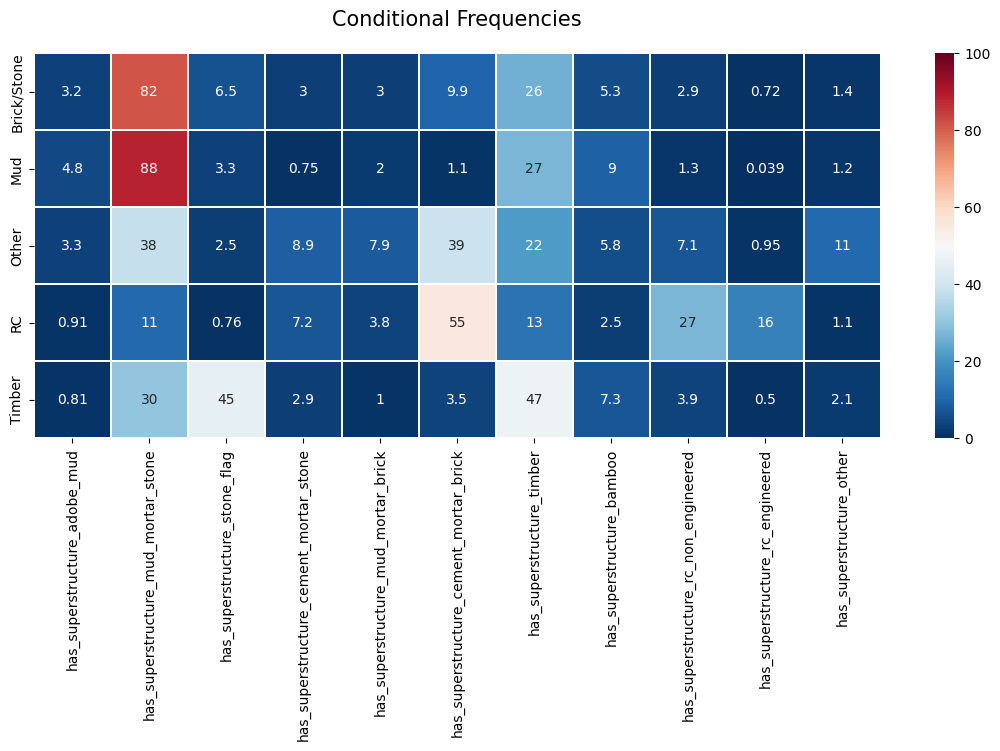

In [57]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['ground_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['ground_floor_type'] == i ][c].sum()/len(df[df["ground_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Other floor type - divided by other floor type










<AxesSubplot:title={'center':'Conditional Frequencies'}>

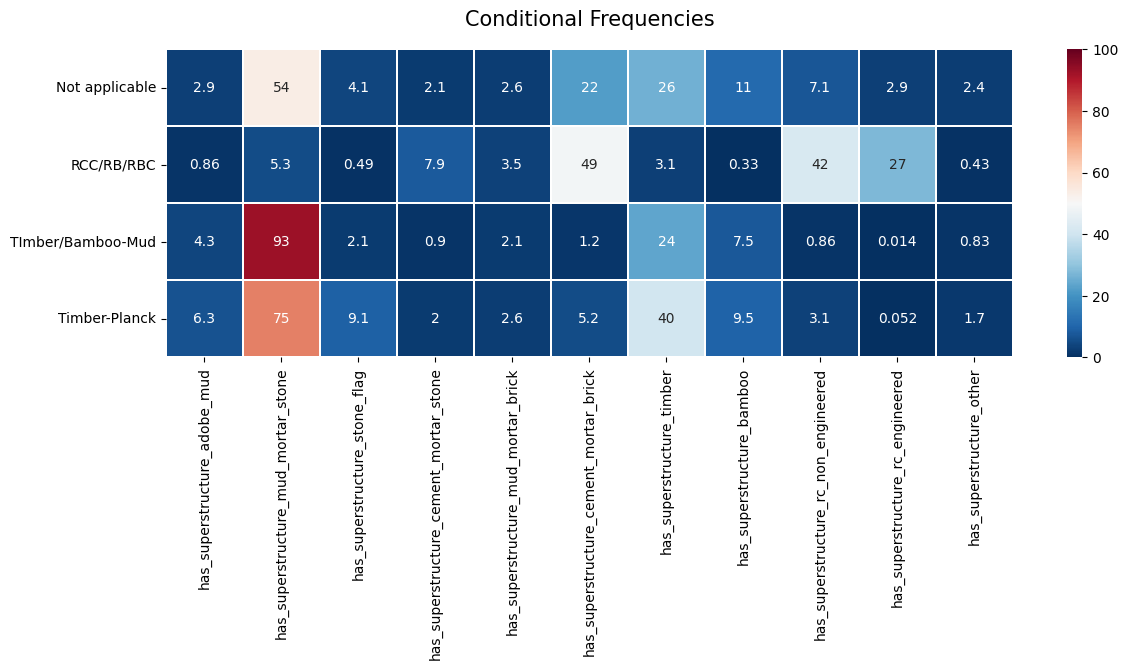

In [58]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['other_floor_type'] == i ][c].sum()/len(df[df["other_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)



### Superstructure X plan configuration - divided by plan configuration











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1979120136.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

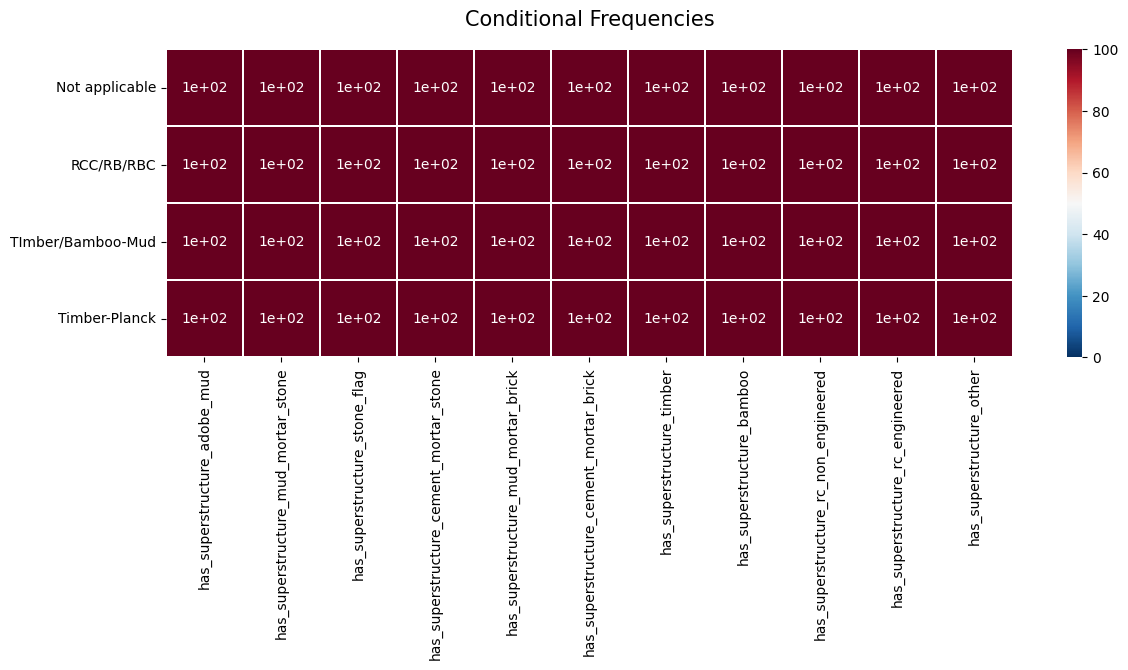

In [65]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)



### Superstructure X condition post earthquake - divided by condition post 











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/724279344.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['condition_post_eq'] == i ][c].sum()/len(df[df["condition_post_eq"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

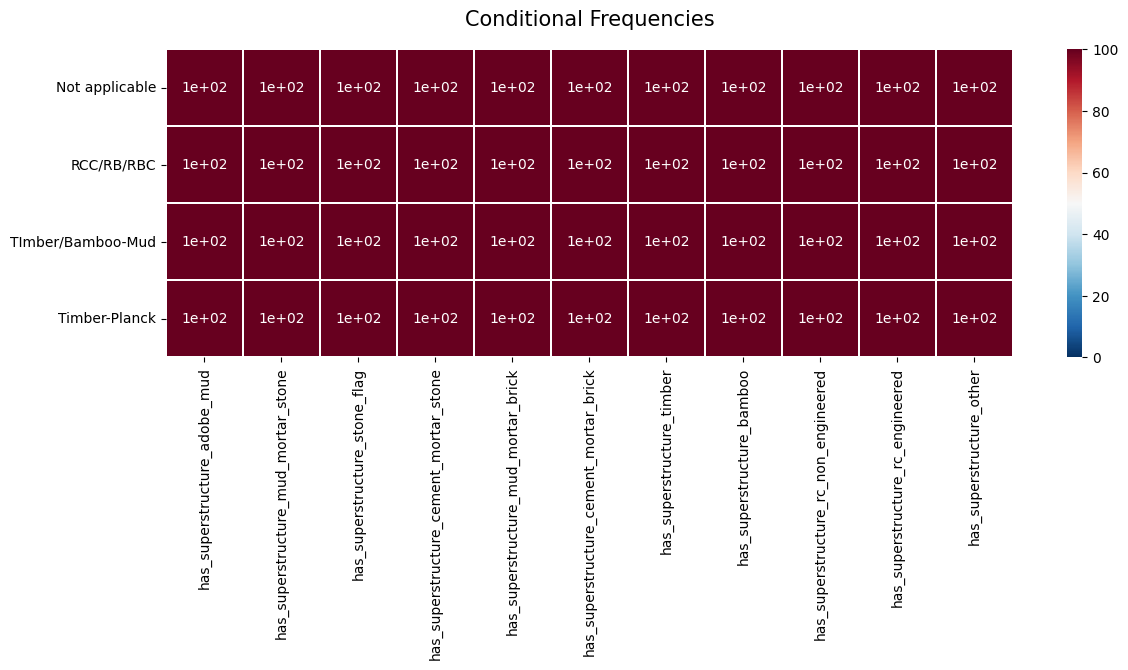

In [63]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['condition_post_eq'] == i ][c].sum()/len(df[df["condition_post_eq"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)



### Superstructure X technical_solution_proposed - divided by condition post 











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/2489595855.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['technical_solution_proposed'] == i ][c].sum()/len(df[df["technical_solution_proposed"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

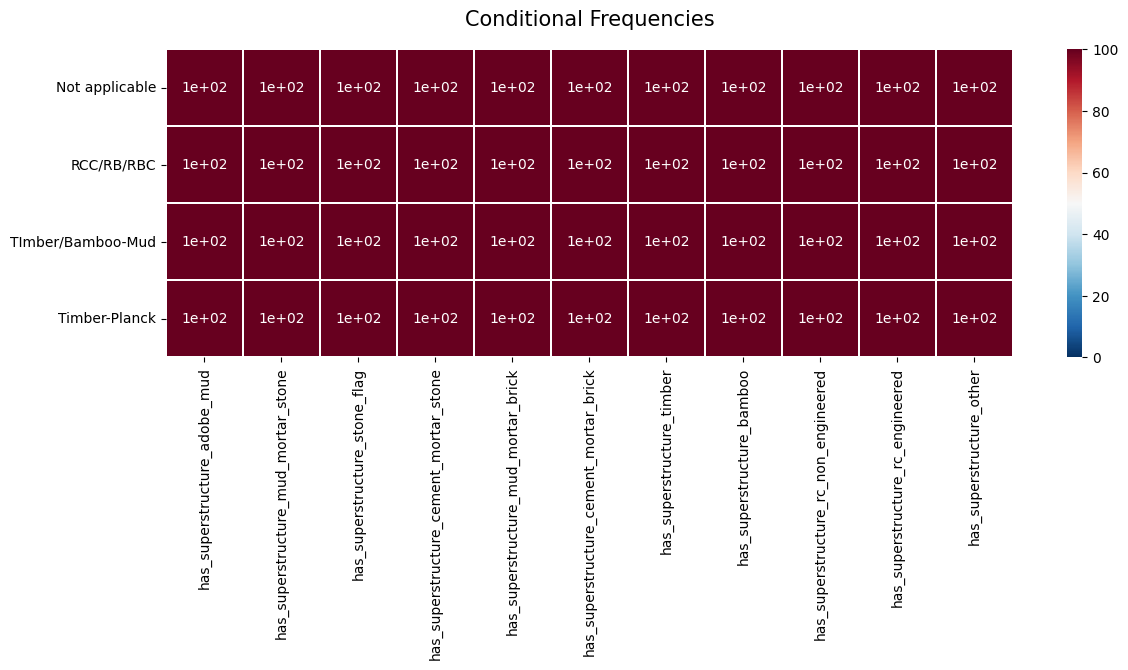

In [67]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['technical_solution_proposed'] == i ][c].sum()/len(df[df["technical_solution_proposed"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


In [66]:
dff.technical_solution_proposed.unique()

array(['Major repair', 'Reconstruction', 'Minor repair', 'No need'],
      dtype=object)

/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/3894176355.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

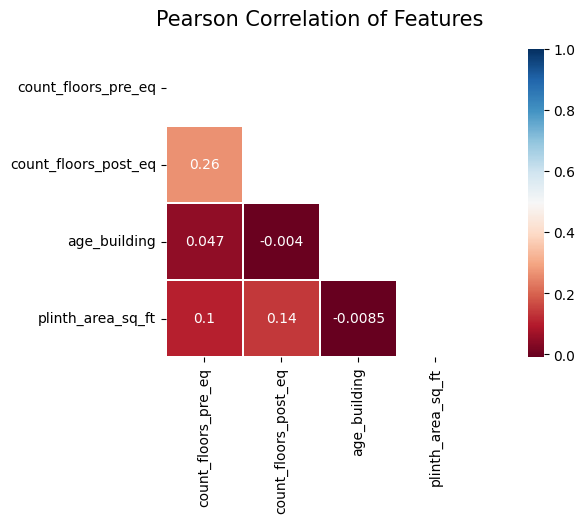

In [60]:
colormap = plt.cm.RdBu
corr = df.iloc[:,3:7].astype(float).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(14,4))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr ,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)